# Titanic Data Analysis

The objective of this data analysis notebook is to merely understand the various patterns, in as much depth as possible in the Titanic disaster which caused such hefty deaths of passengers in its maiden voyage. 

**None of the efforts can bring back or recover the dent left for the affected families, nor is it intended to hurt any specific individual or organization. **

Post initial set of data analysis and data engineering, this notebook aims to provide predictive capabilities for which users would have survived or not. 

![](https://www.changequest.co.uk/wp-content/uploads/cq_titanic_blog.png)

### 1. Data Loading & Basic Analysis

![](https://www.function1.com/sites/default/files/wp-content/uploads/2013/04/Loading-Data.png)

**Initially we will load the rudimentary libraries and load the data which is already provided to us. If need be, we will add and import more data from other data sources which will be mentioned as we go along. The objective of this section is merely to understand the type/kind of data we have available with us and the bare minimal interpretation.**

In [1]:
# Importing the basic libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# import pandas_profiling as pdb
import os
plt.style.use('seaborn-darkgrid')

In [2]:
# Loading the data. 
os.listdir('D:\\CODE\\Visual_Studio_Code_Python\\Data_mining\\2')

['gender_submission.csv',
 'task2.1.py',
 'test.csv',
 'titanic-data-analysis.ipynb',
 'train.csv']

In [3]:
# Loading the training and testing data. 
# we will check how good or bad the data is, that we already have. 
train_data = pd.read_csv('D:\\CODE\\Visual_Studio_Code_Python\\Data_mining\\2\\train.csv')
test_data = pd.read_csv('D:\\CODE\\Visual_Studio_Code_Python\\Data_mining\\2\\test.csv')

In [4]:
# checking the training and testing data. 
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [5]:
# checking the sample data for training data. 
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# for each columns, let's quickly look into the distinct values as well. 
# this is one of the ways in which we can understand any gaps in the data model. 
for each_col in train_data.columns:
    print(each_col)
    print(train_data[each_col].value_counts())
    print("")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

Survived
0    549
1    342
Name: Survived, dtype: int64

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50

In [7]:
# checking basic statistics of training data. 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Checking the information about the data. 
# this will tell us how many and what type of columns/rows we have in the data. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Creating a list of columns which are numeric. 
numeric_cols = list(train_data.select_dtypes(exclude='object').columns)
numeric_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
# creating a list of columns which are categorical or contains string values. 
string_cols = list(train_data.select_dtypes(include='object').columns)
string_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

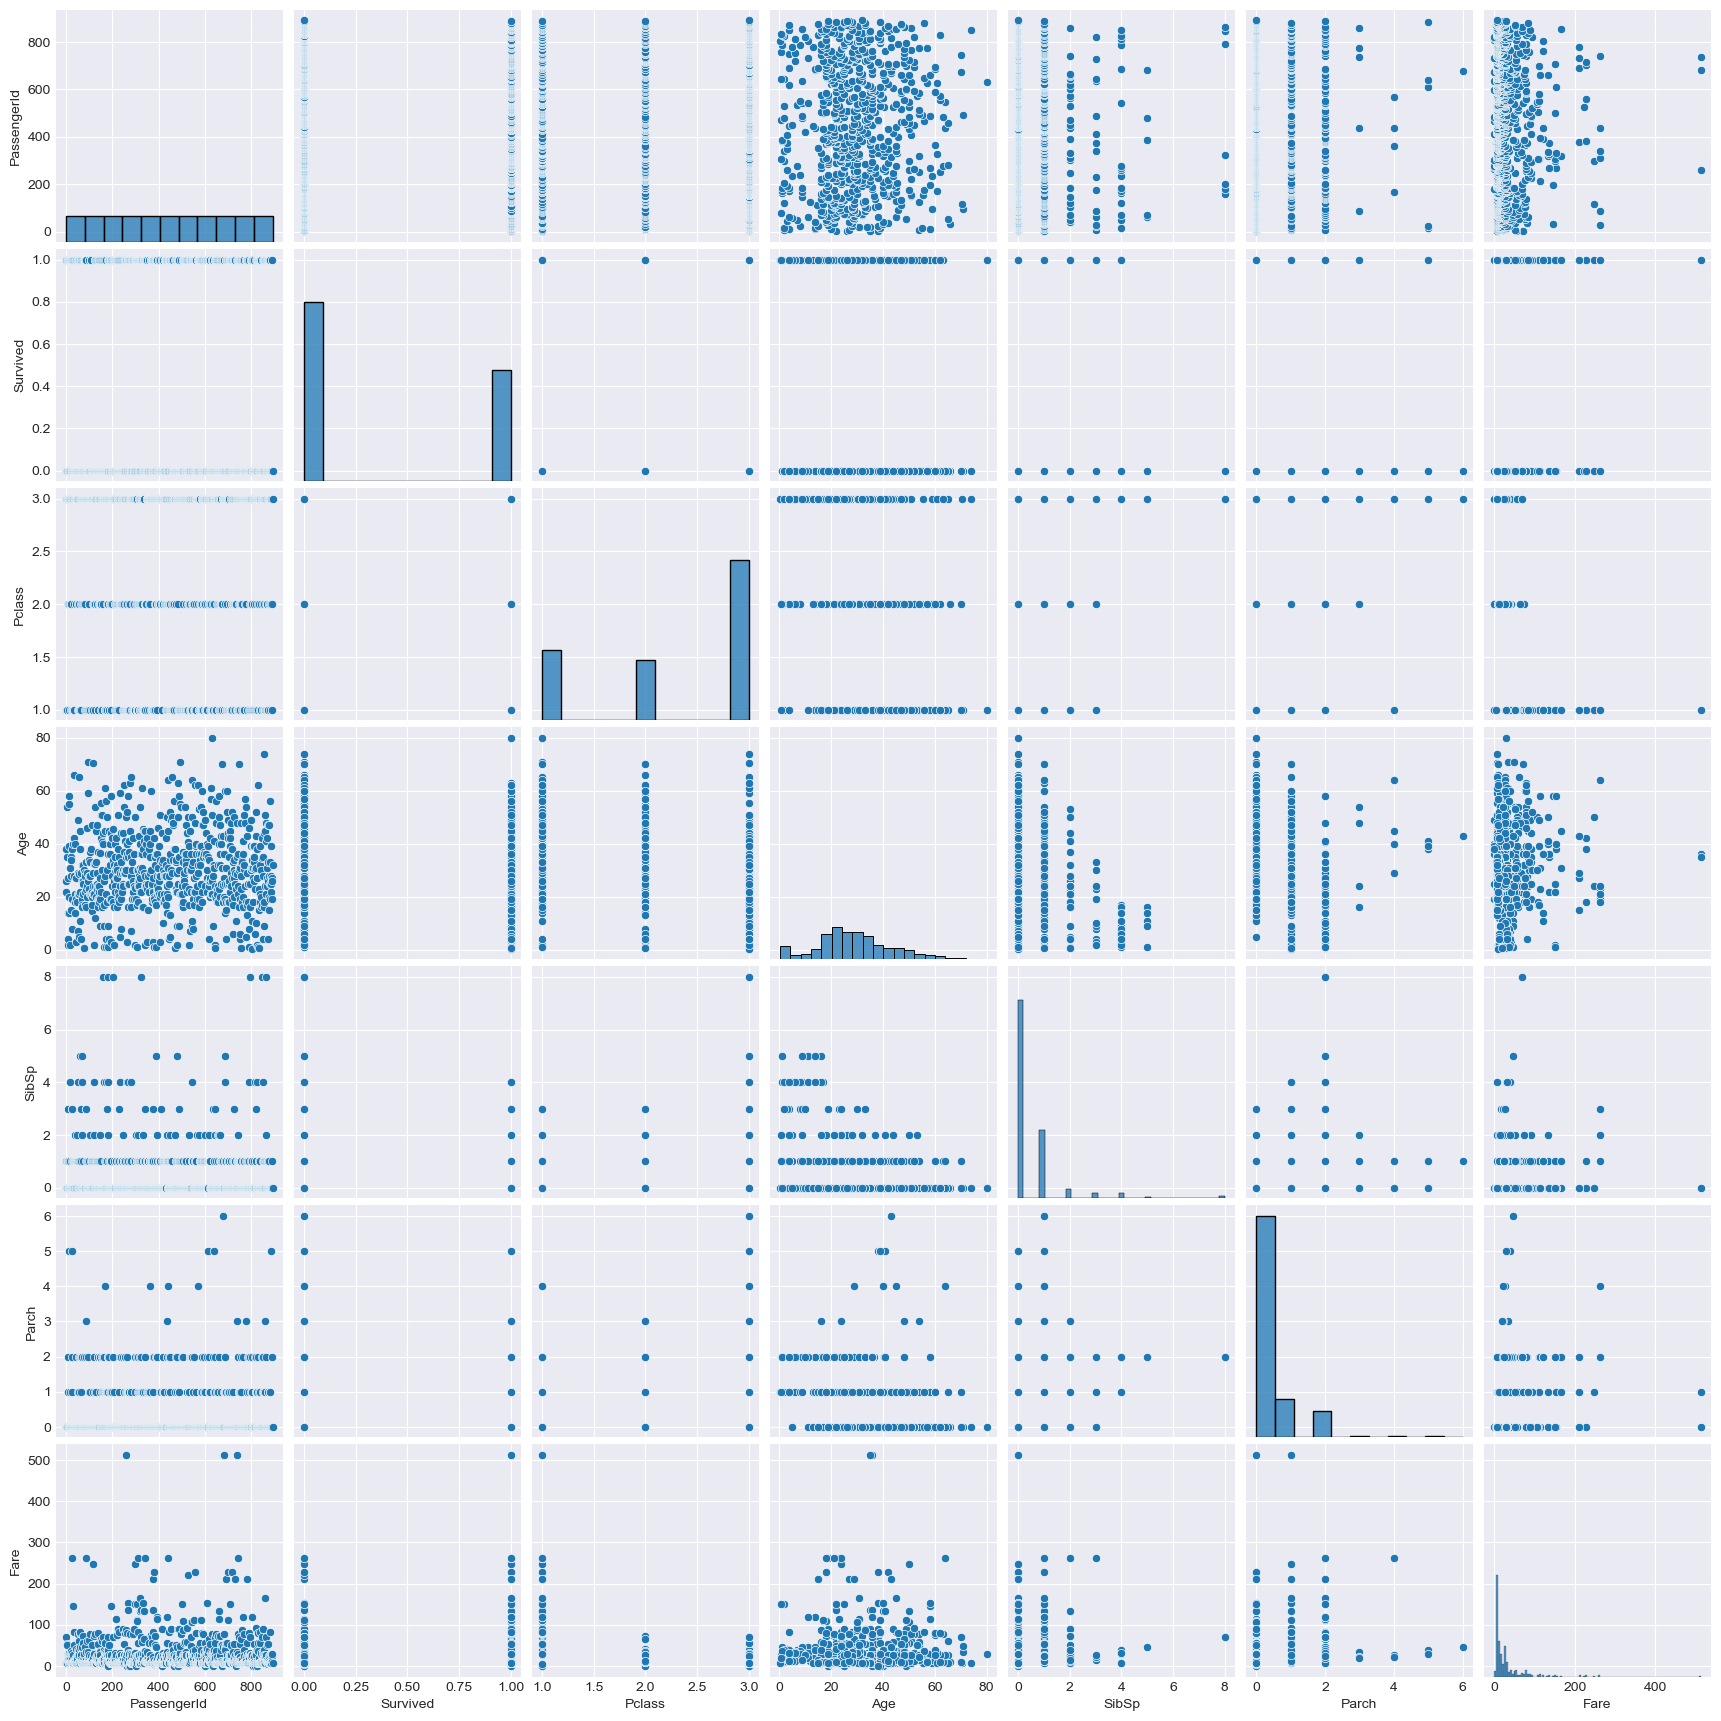

In [11]:
# For each numerical column, let's check the data distribution. 
# for this we are using seaborn library and try performing pairplotting
sns.pairplot(train_data[numeric_cols])
plt.show()

In [12]:
# Clearly we do not need the Passenger ID in this analysis, which we can drop at this stage. 
train_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)

In [13]:
# Creating again, after dropping the passenger ID column, the list of columns which are numeric. 
numeric_cols = list(train_data.select_dtypes(exclude='object').columns)
numeric_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## 2. Data Cleaning & Understanding 

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxMBtILMjt5WI9nc_5szdjxR-CB695P5fEBA&usqp=CAU)

**In this section, we will simply prepare the data using simple targets of removing missing values, finding more columns from existing columns, profiling the data (as a start) to find detailed information about all columns, etc.**

In [14]:
# # using pandas profiler once to look into all the data columns. 
# train_data_profile = pdb.ProfileReport(train_data)
# train_data_profile

In [15]:
## it seems we have some missing values in certain columns. 
## let's look into them again .
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Cabin, Name and Ticket columns are not required for this analysis, since they have very high cardinality and hence they may not result into anything
interesting. However, we can check for data once to see if we can derive new features. 

However, since Cabin column has a lot of missing values, hence there is no point of keeping it for the analysis. 


In [16]:
# dropping the Cabin column.
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [17]:
## Checking the name column. 
train_data['Name'].value_counts().head(20)

Braund, Mr. Owen Harris                                1
Boulos, Mr. Hanna                                      1
Frolicher-Stehli, Mr. Maxmillian                       1
Gilinski, Mr. Eliezer                                  1
Murdlin, Mr. Joseph                                    1
Rintamaki, Mr. Matti                                   1
Stephenson, Mrs. Walter Bertram (Martha Eustis)        1
Elsbury, Mr. William James                             1
Bourke, Miss. Mary                                     1
Chapman, Mr. John Henry                                1
Van Impe, Mr. Jean Baptiste                            1
Leitch, Miss. Jessie Wills                             1
Johnson, Mr. Alfred                                    1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")           1
Taussig, Miss. Ruth                                    1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)    1
Slabenoff, Mr. Petco                                   1
Harrington, Mr. Charles H      

In [18]:
# Let's check the ticket column once. 
train_data['Ticket'].value_counts().head(20)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
W./C. 6608      4
2666            4
19950           4
347077          4
C.A. 31921      3
Name: Ticket, dtype: int64

In [19]:
# dropping the ticket column since we could not see any meaningful or logical patterns from the data. 
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [20]:
# Re-checking the dataframe information. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [21]:
# What about the testng data? 
# does it contain missing values as well ? 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [22]:
# filling the missing data of Age in training and testing data. 
for i in train_data.columns[train_data.isnull().any(axis=0)]:
    print(i)
    train_data[i].fillna(train_data[i].mode(),inplace=True)

Age
Embarked


In [23]:
## For the training and testing data, where Age is missing, we can perform imputation using mode
train_data['Age'] = train_data['Age'].fillna((train_data['Age'].mode().astype('float64')))
test_data['Age'] = test_data['Age'].fillna((test_data['Age'].mode().astype('float64')))

In [24]:
# rechecking the training data. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [25]:
# Looks like the earlier imputation method did not work, hence trying other options. 
from sklearn.impute import SimpleImputer as SI
imr = SI(missing_values=np.nan, strategy='median')
imr = imr.fit(train_data[['Age']])
train_data[['Age']] = imr.transform(train_data[['Age']])

In [26]:
# Checking Age column now. 
train_data['Age'].isna().sum()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [27]:
# Performing similar operation for Embarked column. 
# since it is a categorical column, the 'strategy' will be different. 
imr = SI(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(train_data[['Embarked']])
train_data[['Embarked']] = imr.transform(train_data[['Embarked']])

In [28]:
# rechecking the dataframe information once more. 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [29]:
## Let's repeat the above steps for the Testing data again. 

# for Age column
imr = SI(missing_values=np.nan, strategy='median')
imr = imr.fit(test_data[['Age']])
test_data[['Age']] = imr.transform(test_data[['Age']])

# for Embarked column
imr = SI(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(test_data[['Embarked']])
test_data[['Embarked']] = imr.transform(test_data[['Embarked']])

In [30]:
# Checking the Testing data. 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [31]:
## In the testing data we have Fare data missing. 
## We'll treat it similarly. 

imr = SI(missing_values=np.nan, strategy='median')
imr = imr.fit(test_data[['Fare']])
test_data[['Fare']] = imr.transform(test_data[['Fare']])

In [32]:
# Rechecking the Testing data. 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


**With the Name column, we can try and extract the title information and create new features which can be useful for analysis and later on for Statistical modelling.**

[References](https://www.kaggle.com/bofangli/dealing-with-missing-values-p2-age-imputation)

In [33]:
# Extracting the Title information from Name. 
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [34]:
# Check the counts of each titles
title_counts = train_data.Title.value_counts()
title_counts.to_frame().T

title_counts = test_data.Title.value_counts()
title_counts.to_frame().T


,Mr,Miss,Mrs,Master,Col,Rev,Ms,Dr,Dona
Title,240,78,72,21,2,2,1,1,1


In [35]:
# check the sex of the passengers with different titles in the full dataset

# creating empty sets
female_titles = set()
male_titles = set()

# loop through data of Title column
# add values to the 'empty' sets 
for t in train_data.Title.unique():
    if ((train_data.Title == t) & (train_data.Sex =='female')).any():
        female_titles.add(t)
    if ((train_data.Title == t) & (train_data.Sex =='male')).any():
        male_titles.add(t)

# There will be cases of mixture of titles applicable to both males and females.
mix_titles = female_titles & male_titles

# Finally creating the sets which only belongs to males and females
female_only_titles = female_titles - mix_titles
male_only_titles = male_titles - mix_titles

# Printing the findings. 
print('mix_titles:', mix_titles)
print('female_only_titles', female_only_titles)
print('male_only_titles', male_only_titles)

mix_titles: {'Dr'}
female_only_titles {'Ms', 'Countess', 'Mme', 'Miss', 'Mrs', 'Lady', 'Mlle'}
male_only_titles {'Jonkheer', 'Rev', 'Sir', 'Mr', 'Major', 'Master', 'Col', 'Capt', 'Don'}


In [36]:
# repeating above steps for Test Data too.

# creating empty sets
female_titles = set()
male_titles = set()

# loop through data of Title column
# add values to the 'empty' sets 
for t in test_data.Title.unique():
    if ((test_data.Title == t) & (test_data.Sex =='female')).any():
        female_titles.add(t)
    if ((test_data.Title == t) & (test_data.Sex =='male')).any():
        male_titles.add(t)

# There will be cases of mixture of titles applicable to both males and females.
mix_titles = female_titles & male_titles

# Finally creating the sets which only belongs to males and females
female_only_titles = female_titles - mix_titles
male_only_titles = male_titles - mix_titles

# Printing the findings. 
print('mix_titles:', mix_titles)
print('female_only_titles', female_only_titles)
print('male_only_titles', male_only_titles)

mix_titles: set()
female_only_titles {'Mrs', 'Dona', 'Miss', 'Ms'}
male_only_titles {'Mr', 'Master', 'Rev', 'Dr', 'Col'}


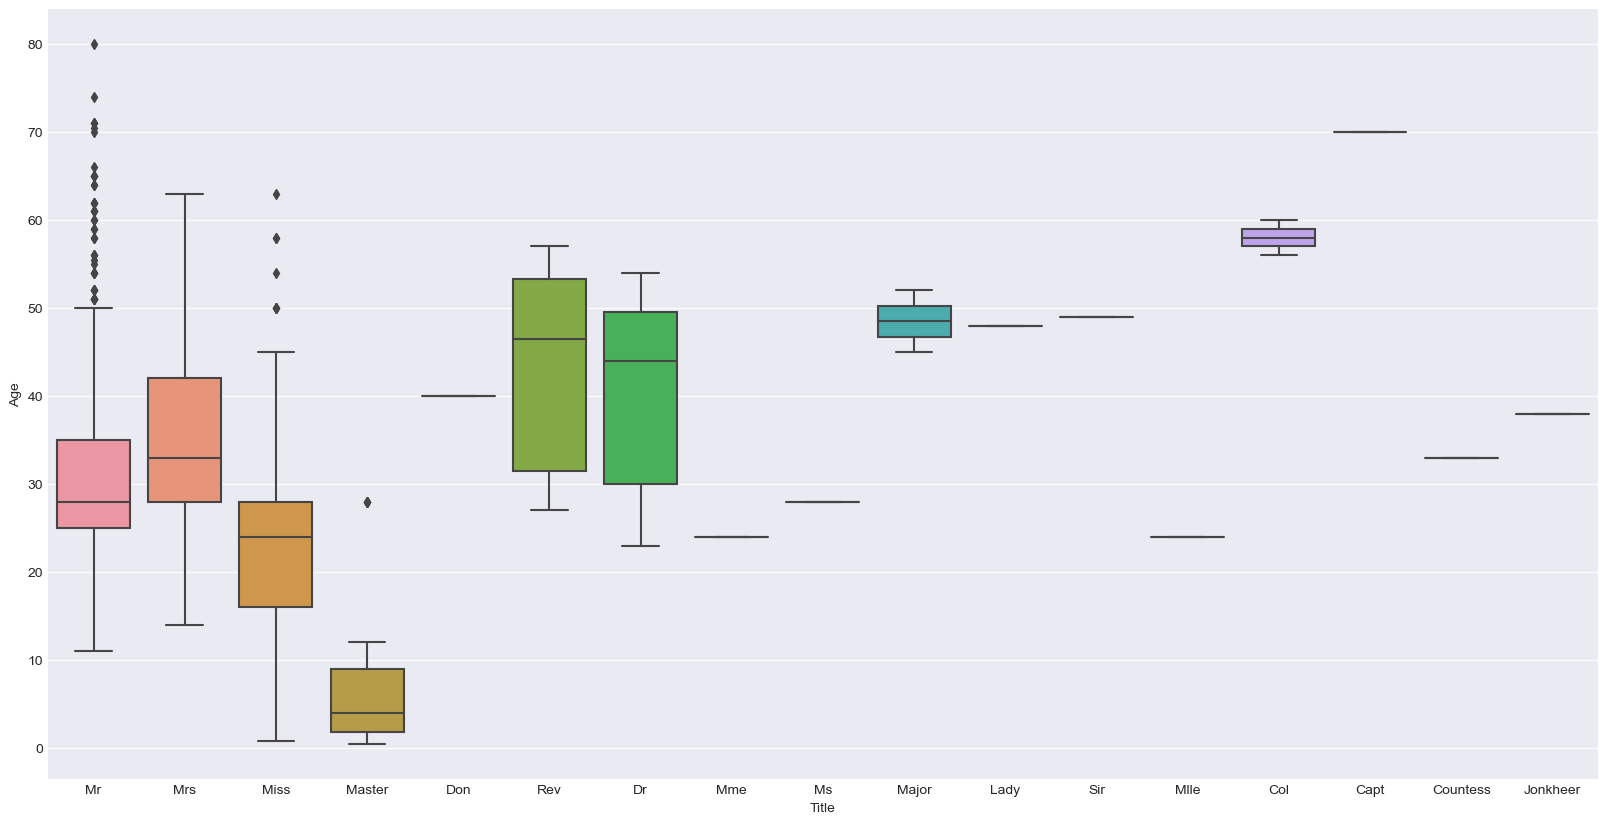

In [37]:
## Visualizing the Title information and Age
plt.figure(figsize=(20,10))
sns.boxplot(x='Title', y='Age', data=train_data)
plt.show()

In [38]:
# change the title from 'Dr' to 'Dr (female)' for the female
train_data.loc[(train_data.Title=='Dr') & (train_data.Sex == 'female'), 'Title'] = 'Dr (female)'
test_data.loc[(test_data.Title=='Dr') & (test_data.Sex == 'female'), 'Title'] = 'Dr (female)'

In [39]:
# creating the title groupings
title_groups = {'Male adult': ['Mr', 'Don', 'Rev', 'Dr',  'Sir', 'Major',  'Col', 'Capt', 'Countess', 'Jonkheer'],
                'Boy': ['Master'],
                'Miss': ['Miss'],
               'Other female': ['Mrs', 'Dona', 'Mme', 'Mlle', 'Ms', 'Lady', 'Dr (female)']}

In [40]:
# adding the new column in the training data for title groups. 
train_data['Title_group'] = train_data['Title']
for k in title_groups:
    train_data['Title_group'].replace(title_groups[k], k, inplace=True)

In [41]:
# repeating the same for testing data. 

test_data['Title_group'] = test_data['Title']
for k in title_groups:
    test_data['Title_group'].replace(title_groups[k], k, inplace=True)

In [42]:
# checking the dataframe information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Title        891 non-null    object 
 10  Title_group  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [43]:
# CHecking the value counts for title group. 
train_data.Title_group.value_counts()

Male adult      538
Miss            182
Other female    131
Boy              40
Name: Title_group, dtype: int64

In [44]:
# CHecking the test data too. 
test_data.Title_group.value_counts()

Male adult      245
Miss             78
Other female     74
Boy              21
Name: Title_group, dtype: int64

In [45]:
# We can now drop the Name column from the Training and Testing data. 
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

**It seems we were able to extract the Title information from the Name of the Passengers successfully!!! This may help in further modelling. If not useful, we will not use the column. We will keep the Title column as of now and drop it later if it causes any issues with Multicollinearity.**

## 3. Data Preparation (Encoding) & More EDA

![](https://i.ibb.co/qFsL4yP/1-d-W-Hv-Owhu-Zk-Num-Yxs4w6ww.png)

**Herewith, we will encode all the character data into numeric data. This will help in further modelling and more understanding of the dataset.**

In [46]:
# Checking the training data. 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Title        891 non-null    object 
 9   Title_group  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None


In [47]:
# Importing the Label Encoder library
from sklearn.preprocessing import LabelEncoder

In [48]:
# Creating an object of Label Encoder
le = LabelEncoder()

In [49]:
# creating list of columns from training and testing data which are object types. 
str_cols_train_data = train_data.select_dtypes(include='object')
str_cols_test_data = test_data.select_dtypes(include='object')

In [50]:
# looping through each columns and label encoding them for both Training and Testing data. 

for each_col in str_cols_train_data:
    train_data[each_col] = le.fit_transform(train_data[each_col])
    
for each_col in str_cols_test_data:
    test_data[each_col] = le.fit_transform(test_data[each_col])

In [51]:
# Checking the training and testing data now. 
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int32  
 8   Title        891 non-null    int32  
 9   Title_group  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 55.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int32  
 2   Age          418 non-null    float64
 3   SibSp 

**Now that we have converted or represented all our categorical or String data into Labels, we can try to see the correlations of each features with the target. For this we will need to use the Training data, since Testing data, as obviously, does not contain the Target label.**

In [52]:
# importing seaborn 
import seaborn as sns

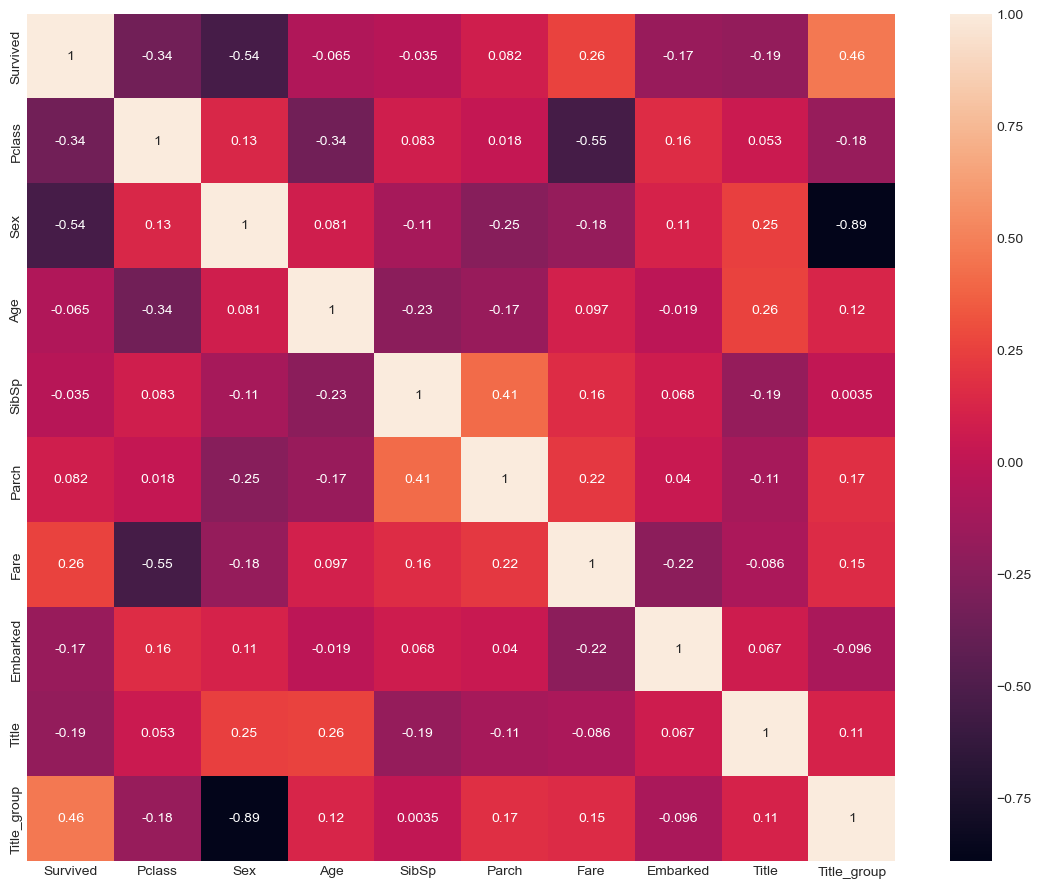

In [53]:
# creating heatmap
plt.figure(figsize=(14,11))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

**Findings:**

1. Fare and Title Groups have positive correlations, although not very strong, with the Survived column which is our Target data. 
2. Sex feature on the other hand has negative correlation with the Survived column. 
3. There seems to be multicollinearity problem within the features. For example, Sex and Title Group are highly negatively correlated. 

**To Address these issues we can use Variance Inflation factor to remove the variables with multicollinearity problems.**

In [54]:
# importing the library to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [55]:
# Checking the list of columns once, in form of a list! 
list(train_data.columns)

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Title',
 'Title_group']

In [56]:
# Creating a list of feature columns. 
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Title_group']

In [57]:
# Creating dataset with features. 
X = train_data[feature_cols]

In [58]:
# Checking the shape of features data. 
X.shape

(891, 9)

In [59]:
# creating a new dataframe to store the variance inflation factor outcomes. 
vif = pd.DataFrame()
vif['Features'] = feature_cols
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

In [60]:
# Checking the VIF dataset. 

vif

,Features,vif
0,Pclass,11.364132
1,Sex,33.314052
2,Age,8.744900
3,SibSp,1.581882
4,Parch,1.618419
5,Fare,2.028448
6,Embarked,4.990066
7,Title,103.652970
8,Title_group,47.480597


In [61]:
# We will drop the Title column first since it has a very high value. 
train_data.drop('Title', axis=1, inplace=True)
test_data.drop('Title', axis=1, inplace=True)

In [62]:
# Rechecking the VIF information
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title_group']
X = train_data[feature_cols]
vif = pd.DataFrame()
vif['Features'] = feature_cols
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
vif

,Features,vif
0,Pclass,10.721667
1,Sex,8.508983
2,Age,8.694807
3,SibSp,1.580184
4,Parch,1.618208
5,Fare,1.997002
6,Embarked,4.962769
7,Title_group,11.595114


**We still have multicollinearity problem within the data, but we will keep it as it is and try fitting such models during our modelling stage which are not impacted by Multicollinearity problems within the data, like Trees!** 

In [63]:
# Checking, finally, the data related to training and testing. 
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int32  
 8   Title_group  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int32  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch  

**Shall we perform Feature scaling? It depends! We need to check first if we have outliers in the data or not, and if yes, we should ideally standard scale the data. Before doing so, the Training data should be divided into X and y sets, where X is the features data and y are the labels!**

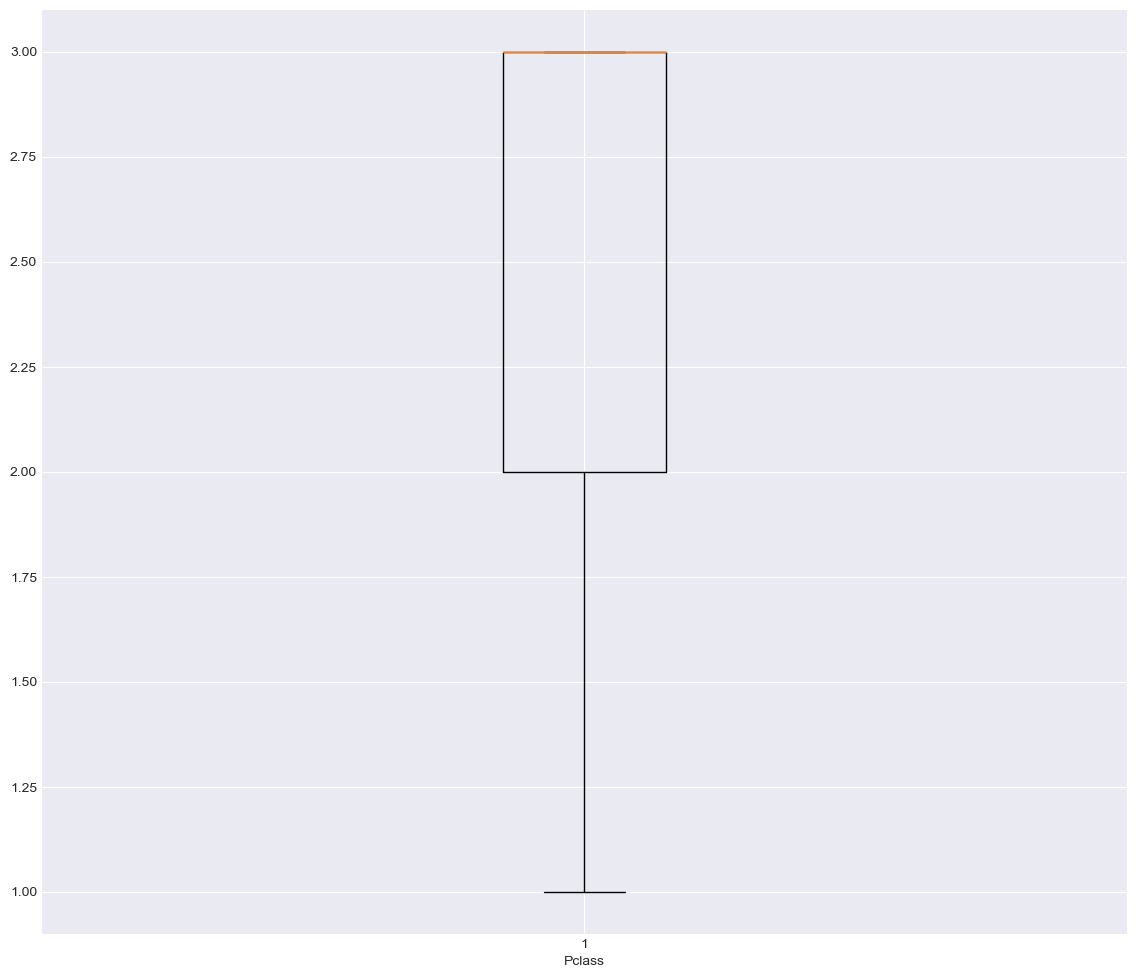

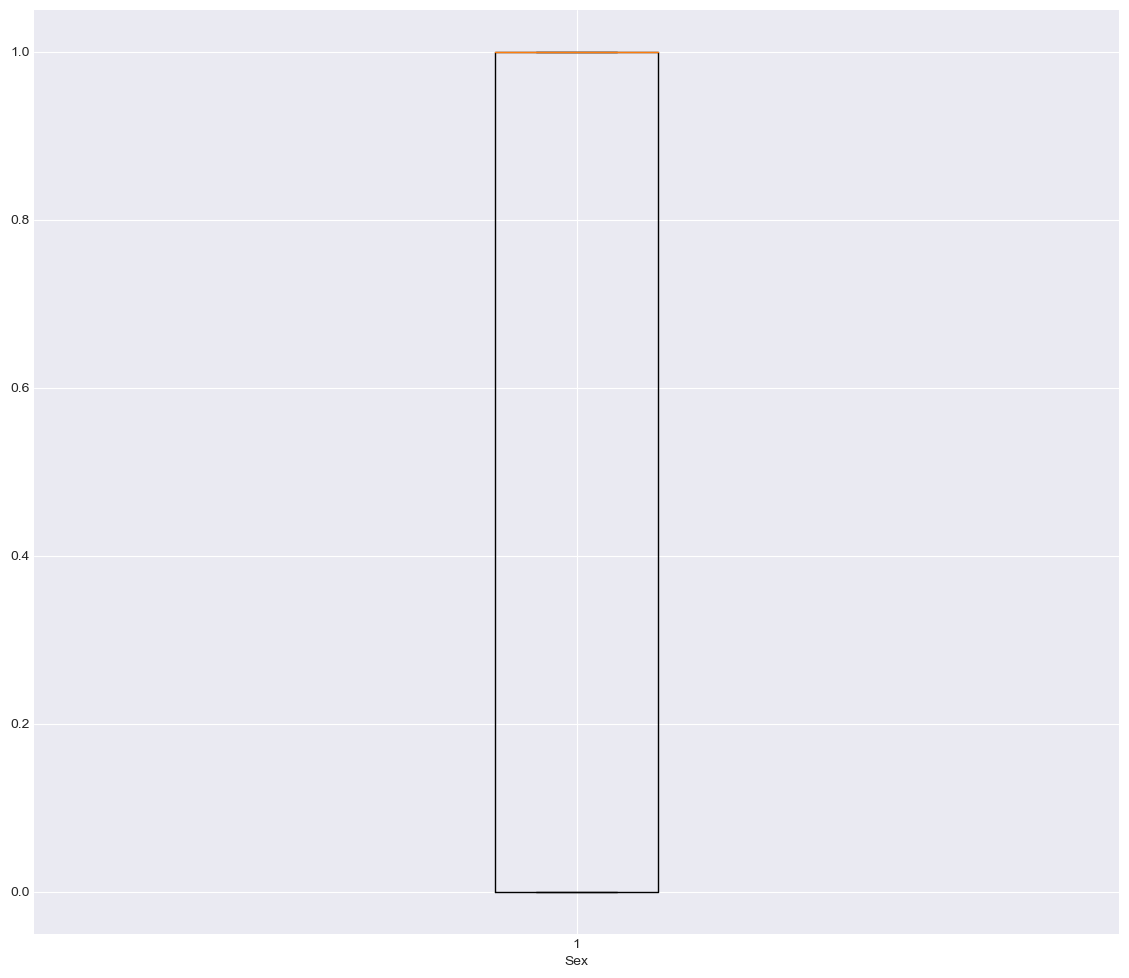

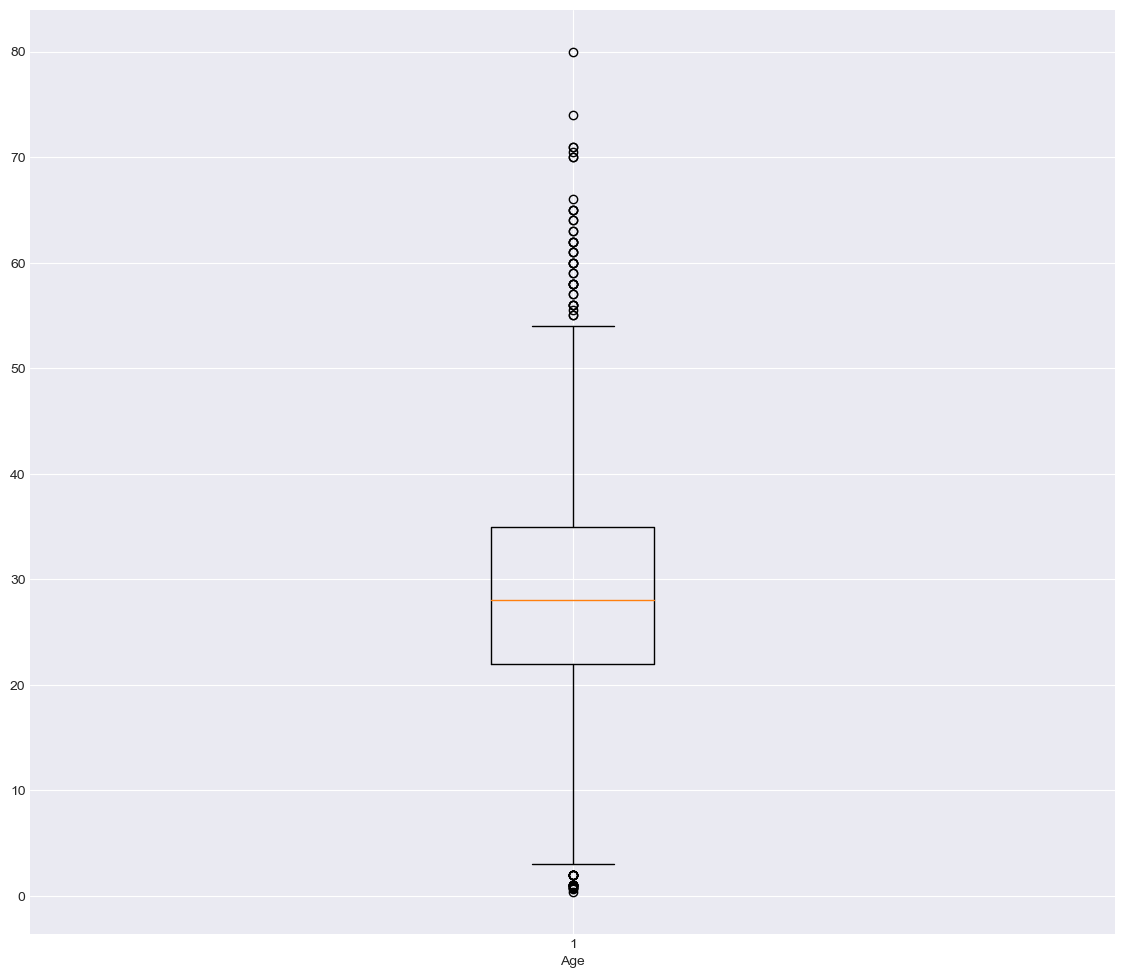

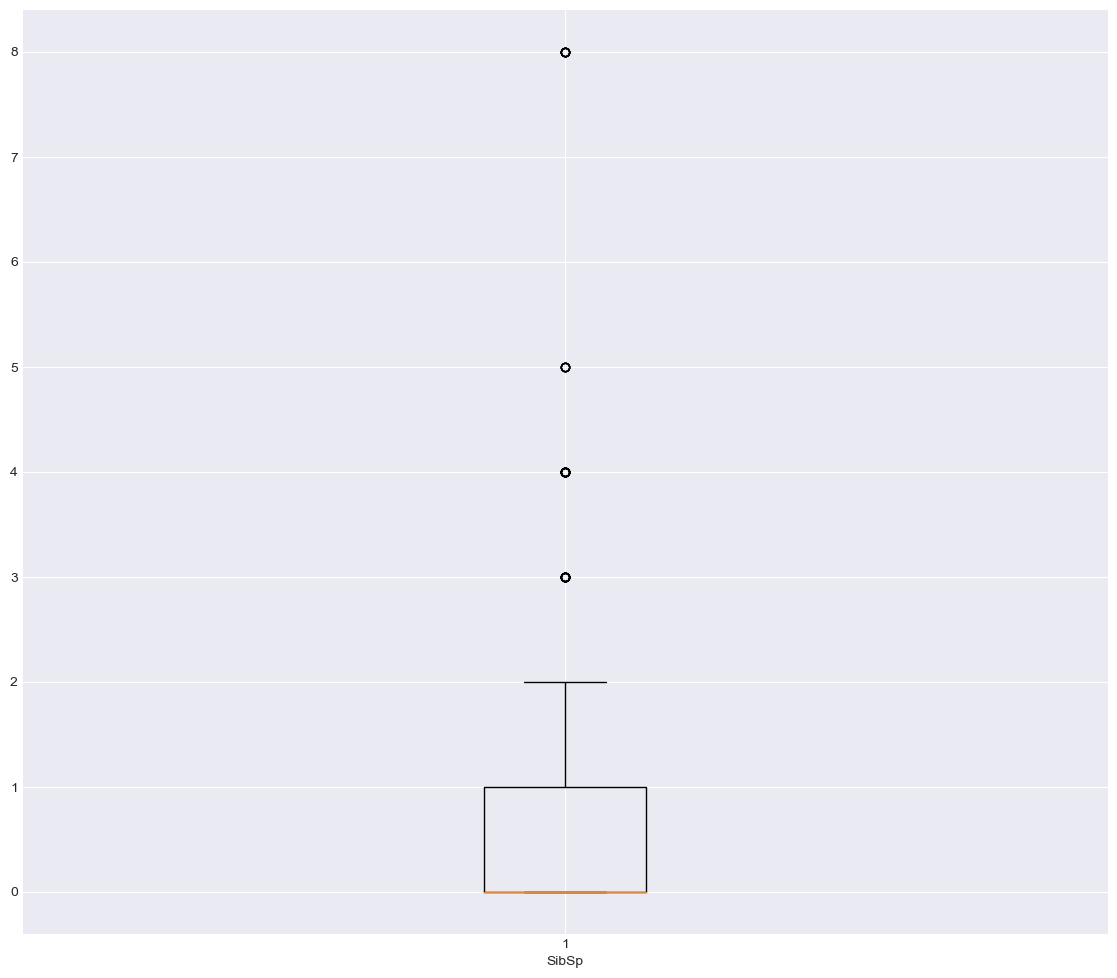

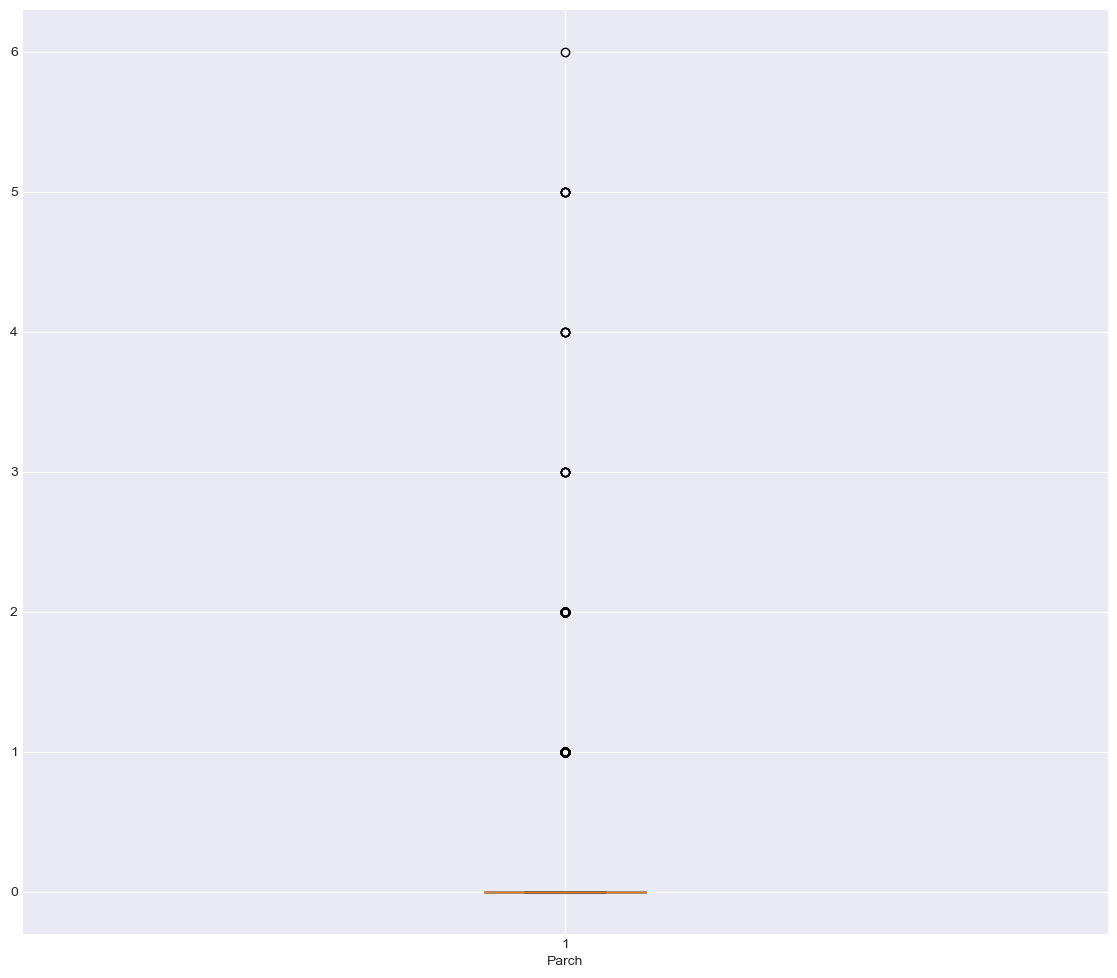

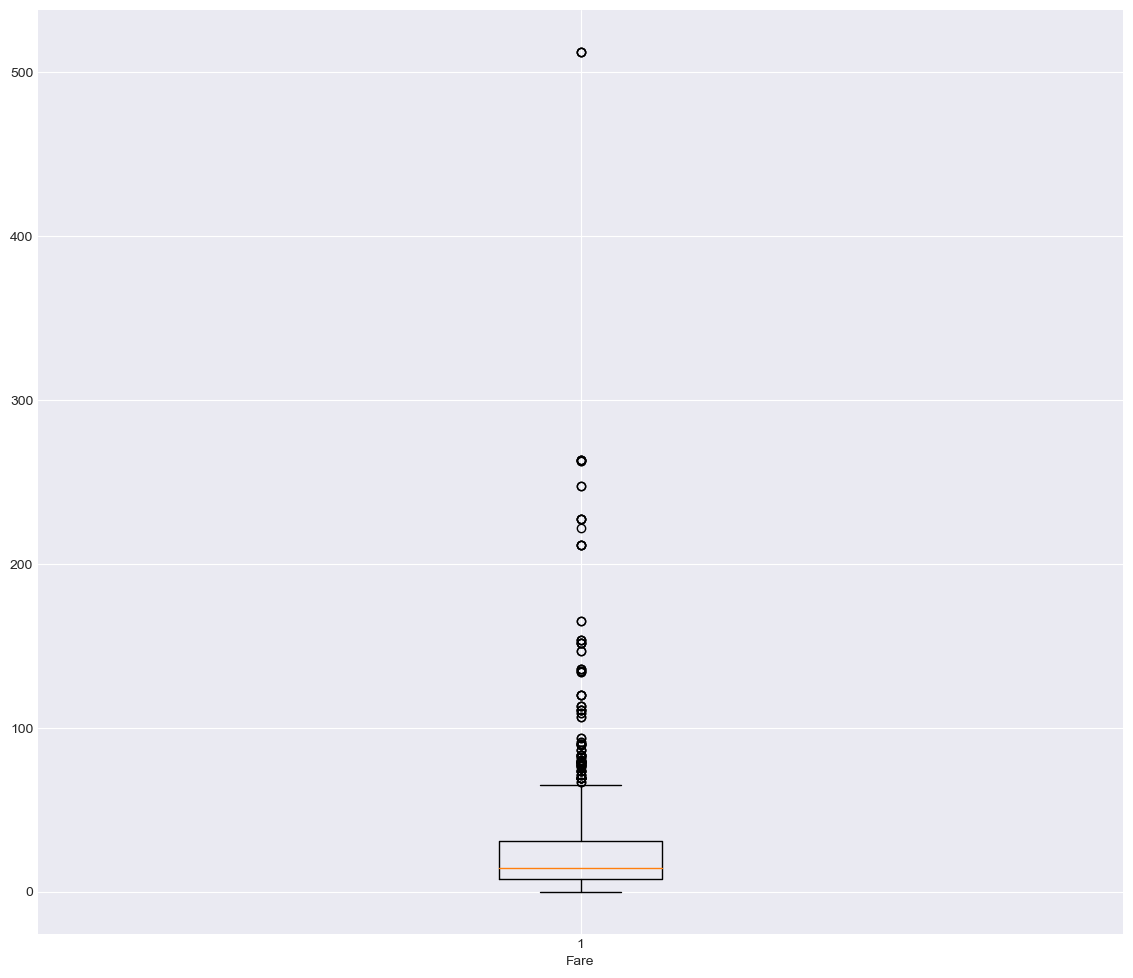

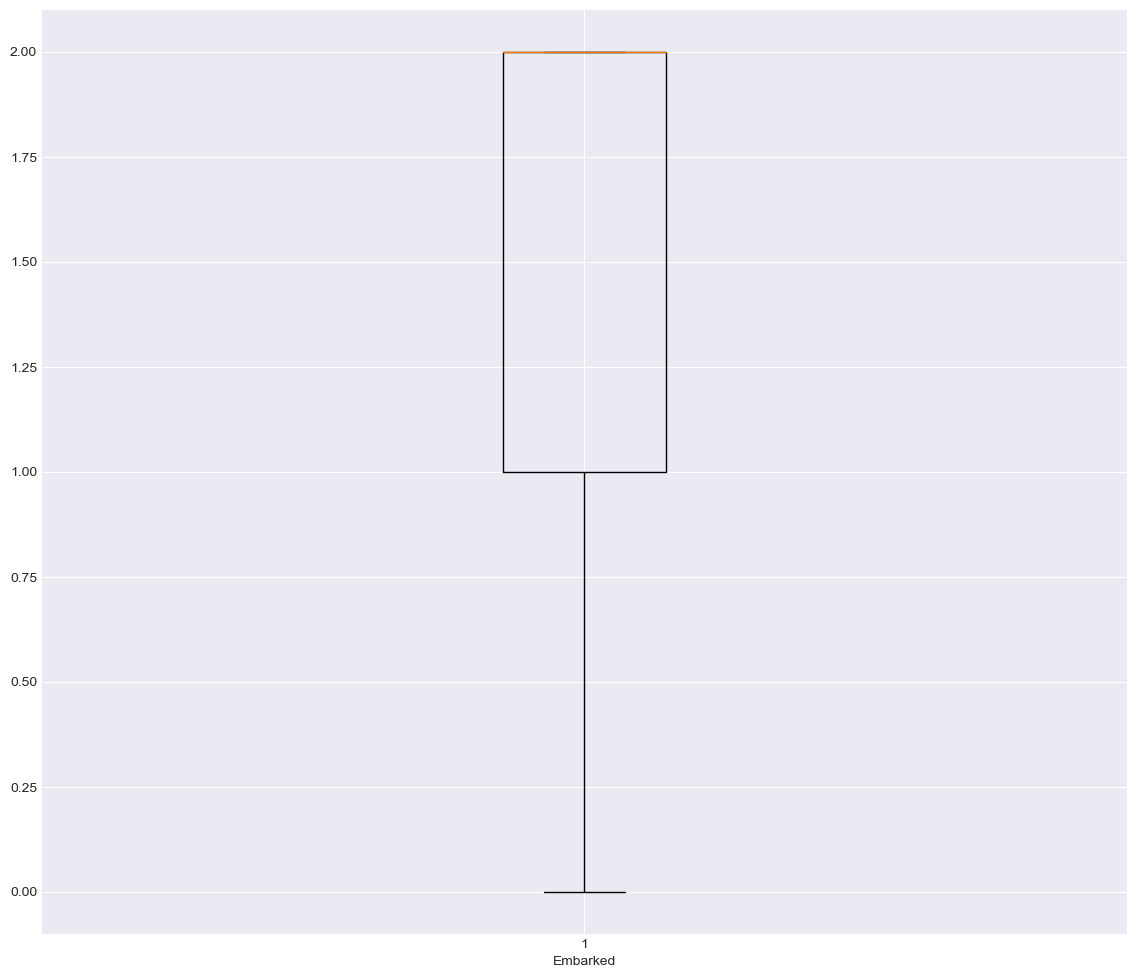

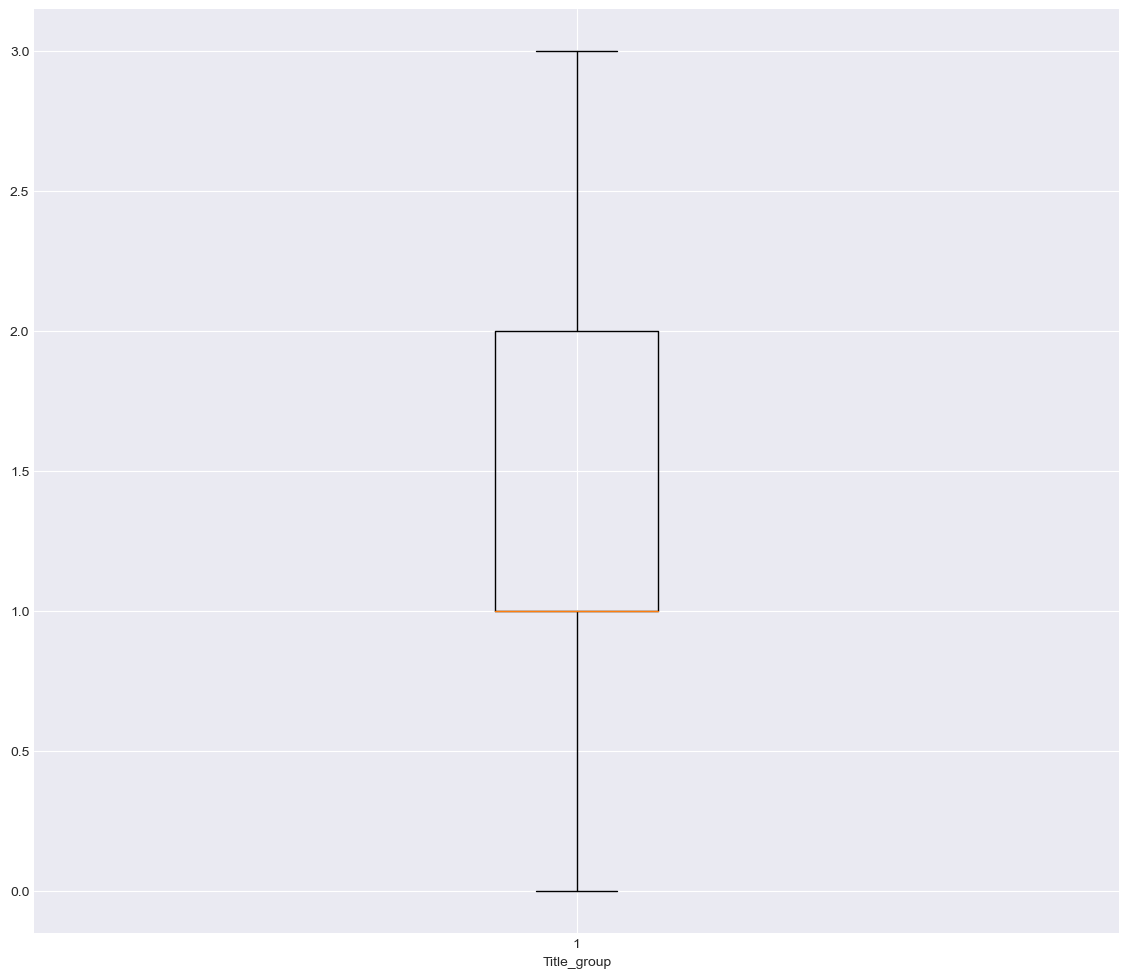

In [64]:
# Checking for outliers in the data. 
for each_col in X.columns:
    plt.figure(figsize=(14,12))
    plt.boxplot(train_data[each_col])
    plt.xlabel(each_col)
    plt.show()

**It seems the features Age and Fare have some outliers in them, which are logical too, since these are essentially such features where we can have outliers in the data. We will not treat the data right now, but continue with a series of modelling, before we finally conclude on the best way to make the data more robust.**

## 4. Initial Modelling! 

![](https://www.disruptivestatic.com/wp-content/uploads/2018/05/machine-learning-ecommerce-blog-1.jpg)